In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv('Data_Pull.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    581 non-null    object 
 1   MRP             572 non-null    float64
 2   Price           580 non-null    object 
 3   Star Ratings    535 non-null    float64
 4   No. of Ratings  535 non-null    float64
 5   Sales           89 non-null     object 
dtypes: float64(3), object(3)
memory usage: 27.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MRP,572.0,1054.810804,561.714856,199.0,645.5,999.0,1299.0,5649.0
Star Ratings,535.0,4.094579,0.419189,2.7,3.9,4.1,4.3,5.0
No. of Ratings,535.0,519.573832,1445.131463,1.0,12.0,59.0,310.0,12555.0


In [6]:
df.isnull().sum()

Product Name        0
MRP                 9
Price               1
Star Ratings       46
No. of Ratings     46
Sales             492
dtype: int64

In [7]:
# Cleaning numerical columns: remove commas and convert to float
def clean_numeric_column(column):
    return column.str.replace(',', '').astype(float)

df['MRP'] = clean_numeric_column(df['MRP'].astype(str))
df['Price'] = clean_numeric_column(df['Price'].astype(str))
df['Star Ratings'] = clean_numeric_column(df['Star Ratings'].astype(str))
df['No. of Ratings'] = clean_numeric_column(df['No. of Ratings'].astype(str))

# Handling missing values
df['MRP'].fillna(df['MRP'].median(), inplace=True)
df['Price'].fillna(df['Price'].median(), inplace=True)
df['Star Ratings'].fillna(df['Star Ratings'].mean(), inplace=True)
df['No. of Ratings'].fillna(df['No. of Ratings'].mean(), inplace=True)

In [8]:
df

,Product Name,MRP,Price,Star Ratings,No. of Ratings,Sales
0,STITCHNEST Unique Cute Elephant Cartoon Blue P...,999.0,379.0,4.400000,4284.000000,1000
1,ACN Kohinoor | Macrame Cushion Cover 16 X 16 I...,1199.0,349.0,4.100000,149.000000,300+ bought in past month
2,Kaahira Handmade Cotton Macrame Cushion Pillow...,1289.0,349.0,4.000000,410.000000,400+ bought in past month
3,AEROHAVEN Premium Set of 5 Geometric Cotton Di...,999.0,486.0,4.200000,239.000000,200+ bought in past month
4,Brick Home Floral Printed Poly Cotton Cushion ...,999.0,549.0,4.200000,902.000000,200+ bought in past month
...,...,...,...,...,...,...
576,The White Willow Memory Foam Decorative Square...,999.0,299.0,5.000000,7.000000,NaN
577,SEEVO 400 TC Luxurious Satin Silk Pillow Cover...,898.0,449.0,4.100000,284.000000,NaN
578,VOMZER Premium 300 TC Cotton Printed Pillow Co...,1299.0,229.0,5.000000,1.000000,NaN
579,VAS COLLECTIONS® 105 TC Premium Cotton King Si...,999.0,379.0,4.094579,519.573832,NaN


In [9]:
# Task 1: Extract the brand name
def extract_brand(product_name):
    return product_name.split()[0]

df['Brand'] = df['Product Name'].apply(extract_brand)
df

,Product Name,MRP,Price,Star Ratings,No. of Ratings,Sales,Brand
0,STITCHNEST Unique Cute Elephant Cartoon Blue P...,999.0,379.0,4.400000,4284.000000,1000,STITCHNEST
1,ACN Kohinoor | Macrame Cushion Cover 16 X 16 I...,1199.0,349.0,4.100000,149.000000,300+ bought in past month,ACN
2,Kaahira Handmade Cotton Macrame Cushion Pillow...,1289.0,349.0,4.000000,410.000000,400+ bought in past month,Kaahira
3,AEROHAVEN Premium Set of 5 Geometric Cotton Di...,999.0,486.0,4.200000,239.000000,200+ bought in past month,AEROHAVEN
4,Brick Home Floral Printed Poly Cotton Cushion ...,999.0,549.0,4.200000,902.000000,200+ bought in past month,Brick
...,...,...,...,...,...,...,...
576,The White Willow Memory Foam Decorative Square...,999.0,299.0,5.000000,7.000000,NaN,The
577,SEEVO 400 TC Luxurious Satin Silk Pillow Cover...,898.0,449.0,4.100000,284.000000,NaN,SEEVO
578,VOMZER Premium 300 TC Cotton Printed Pillow Co...,1299.0,229.0,5.000000,1.000000,NaN,VOMZER
579,VAS COLLECTIONS® 105 TC Premium Cotton King Si...,999.0,379.0,4.094579,519.573832,NaN,VAS


In [10]:
# Task 2: Predict monthly sales
def estimate_monthly_sales(sales_info):
    if pd.isna(sales_info):
        return 0  # Assigning 0 if sales info is NaN
    if isinstance(sales_info, str) and "bought in past month" in sales_info:
        return int(sales_info.split("+")[0])
    return int(sales_info)

df['Monthly Sales Estimate'] = df['Sales'].apply(lambda x: estimate_monthly_sales(x))

df

,Product Name,MRP,Price,Star Ratings,No. of Ratings,Sales,Brand,Monthly Sales Estimate
0,STITCHNEST Unique Cute Elephant Cartoon Blue P...,999.0,379.0,4.400000,4284.000000,1000,STITCHNEST,1000
1,ACN Kohinoor | Macrame Cushion Cover 16 X 16 I...,1199.0,349.0,4.100000,149.000000,300+ bought in past month,ACN,300
2,Kaahira Handmade Cotton Macrame Cushion Pillow...,1289.0,349.0,4.000000,410.000000,400+ bought in past month,Kaahira,400
3,AEROHAVEN Premium Set of 5 Geometric Cotton Di...,999.0,486.0,4.200000,239.000000,200+ bought in past month,AEROHAVEN,200
4,Brick Home Floral Printed Poly Cotton Cushion ...,999.0,549.0,4.200000,902.000000,200+ bought in past month,Brick,200
...,...,...,...,...,...,...,...,...
576,The White Willow Memory Foam Decorative Square...,999.0,299.0,5.000000,7.000000,NaN,The,0
577,SEEVO 400 TC Luxurious Satin Silk Pillow Cover...,898.0,449.0,4.100000,284.000000,NaN,SEEVO,0
578,VOMZER Premium 300 TC Cotton Printed Pillow Co...,1299.0,229.0,5.000000,1.000000,NaN,VOMZER,0
579,VAS COLLECTIONS® 105 TC Premium Cotton King Si...,999.0,379.0,4.094579,519.573832,NaN,VAS,0


In [11]:
# Features and target
features = df[['MRP', 'Price', 'Star Ratings', 'No. of Ratings']]
target = df['Monthly Sales Estimate']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
# Display a sample of the dataframe
df.head()

,Product Name,MRP,Price,Star Ratings,No. of Ratings,Sales,Brand,Monthly Sales Estimate
0,STITCHNEST Unique Cute Elephant Cartoon Blue P...,999.0,379.0,4.4,4284.0,1000,STITCHNEST,1000
1,ACN Kohinoor | Macrame Cushion Cover 16 X 16 I...,1199.0,349.0,4.1,149.0,300+ bought in past month,ACN,300
2,Kaahira Handmade Cotton Macrame Cushion Pillow...,1289.0,349.0,4.0,410.0,400+ bought in past month,Kaahira,400
3,AEROHAVEN Premium Set of 5 Geometric Cotton Di...,999.0,486.0,4.2,239.0,200+ bought in past month,AEROHAVEN,200
4,Brick Home Floral Printed Poly Cotton Cushion ...,999.0,549.0,4.2,902.0,200+ bought in past month,Brick,200


In [14]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    }

# Display results
results_df = pd.DataFrame(results).T
results_df


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-squared
Linear Regression,2240.879801,28.735462,47.337932,0.240049
Decision Tree Regressor,3231.837607,20.299145,56.849253,-0.096014
Random Forest Regressor,5541.069949,28.176638,74.438363,-0.879145
Gradient Boosting Regressor,4307.360601,27.582879,65.630485,-0.460757


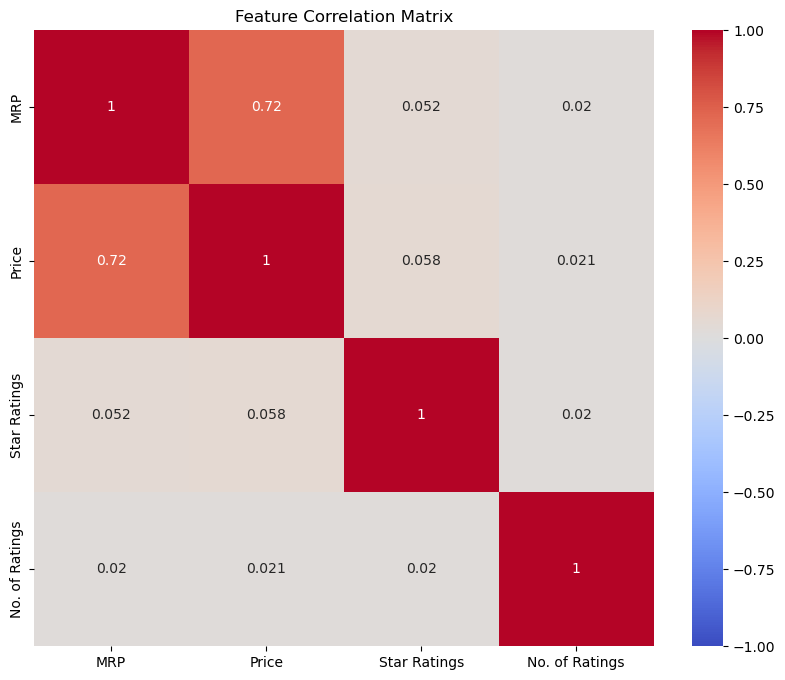

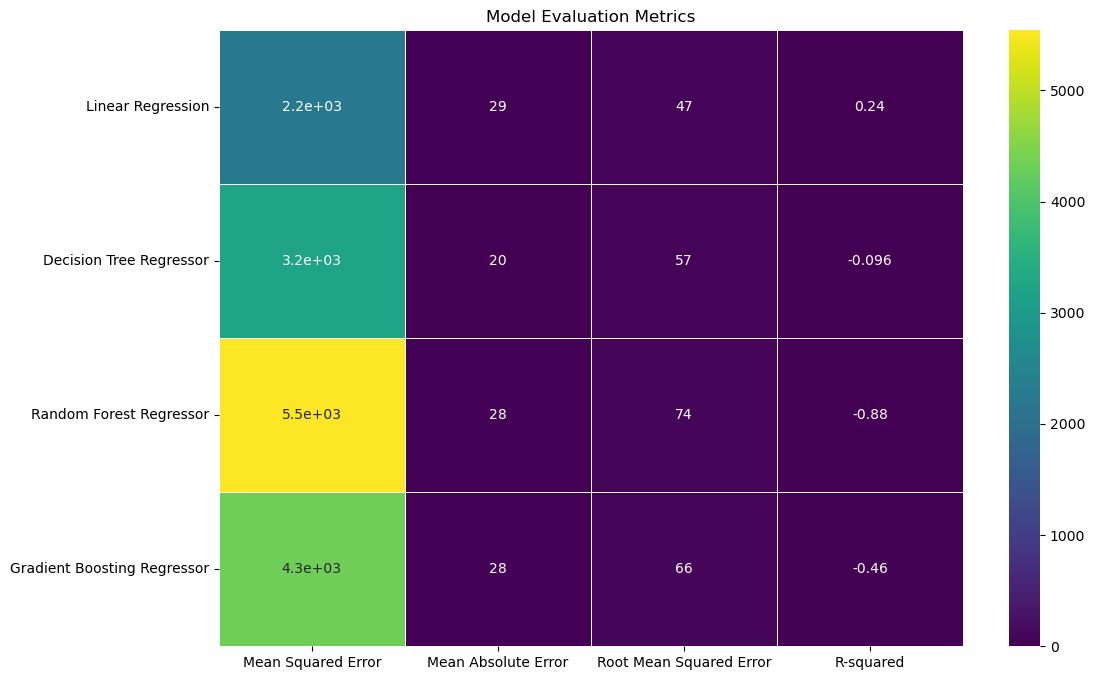

The best model is: Linear Regression with R-squared: 0.2400494589590738


In [15]:
# Plotting correlation matrix for features
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

# Plotting heatmap for model evaluation metrics
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Model Evaluation Metrics')
plt.show()

# Displaying the best model
best_model_name = results_df['R-squared'].idxmax()
print(f"The best model is: {best_model_name} with R-squared: {results_df.loc[best_model_name, 'R-squared']}")


In [16]:
# Adding predictions of the best model back to the dataframe
best_model = models[best_model_name]
df['Predicted Monthly Sales'] = best_model.predict(features)

# Save the dataframe to a CSV file
df.to_csv('final_enhanced_product_data.csv', index=False)

In [17]:
df

,Product Name,MRP,Price,Star Ratings,No. of Ratings,Sales,Brand,Monthly Sales Estimate,Predicted Monthly Sales
0,STITCHNEST Unique Cute Elephant Cartoon Blue P...,999.0,379.0,4.400000,4284.000000,1000,STITCHNEST,1000,166.023326
1,ACN Kohinoor | Macrame Cushion Cover 16 X 16 I...,1199.0,349.0,4.100000,149.000000,300+ bought in past month,ACN,300,33.800779
2,Kaahira Handmade Cotton Macrame Cushion Pillow...,1289.0,349.0,4.000000,410.000000,400+ bought in past month,Kaahira,400,43.111406
3,AEROHAVEN Premium Set of 5 Geometric Cotton Di...,999.0,486.0,4.200000,239.000000,200+ bought in past month,AEROHAVEN,200,20.500169
4,Brick Home Floral Printed Poly Cotton Cushion ...,999.0,549.0,4.200000,902.000000,200+ bought in past month,Brick,200,36.291997
...,...,...,...,...,...,...,...,...,...
576,The White Willow Memory Foam Decorative Square...,999.0,299.0,5.000000,7.000000,NaN,The,0,41.237345
577,SEEVO 400 TC Luxurious Satin Silk Pillow Cover...,898.0,449.0,4.100000,284.000000,NaN,SEEVO,0,21.817258
578,VOMZER Premium 300 TC Cotton Printed Pillow Co...,1299.0,229.0,5.000000,1.000000,NaN,VOMZER,0,54.590882
579,VAS COLLECTIONS® 105 TC Premium Cotton King Si...,999.0,379.0,4.094579,519.573832,NaN,VAS,0,38.432708
